In [1]:
!nvidia-smi

Thu Jul  4 07:36:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Dependency Installation

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

### Import Dependecies

In [3]:
from google.colab import userdata
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import math
import cv2
import random

random.seed(42)

### Download Dataset

In [6]:
rf = Roboflow(api_key=userdata.get("RoboFlow_API_Key"))
project = rf.workspace("vo-vy").project("trafficsigns-p363x")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TrafficSigns-1 in yolov8:: 100%|██████████| 20708/20708 [00:02<00:00, 9766.55it/s] 


### Train Model on Our Dataset

In [10]:
model = YOLO('yolov8n.pt')
results = model.train(data='/content/TrafficSigns-1/data.yaml', epochs=30, imgsz=640, batch=64, plots=True)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/TrafficSigns-1/data.yaml, epochs=30, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fal

### Save Results In Google Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import shutil
shutil.copytree('/content/runs/', '/content/drive/MyDrive/Models/TrafficSignDetection_Yolov8')

'/content/drive/MyDrive/Models/TrafficSignDetection_Yolov8'

### Model Performance Metrics and Results

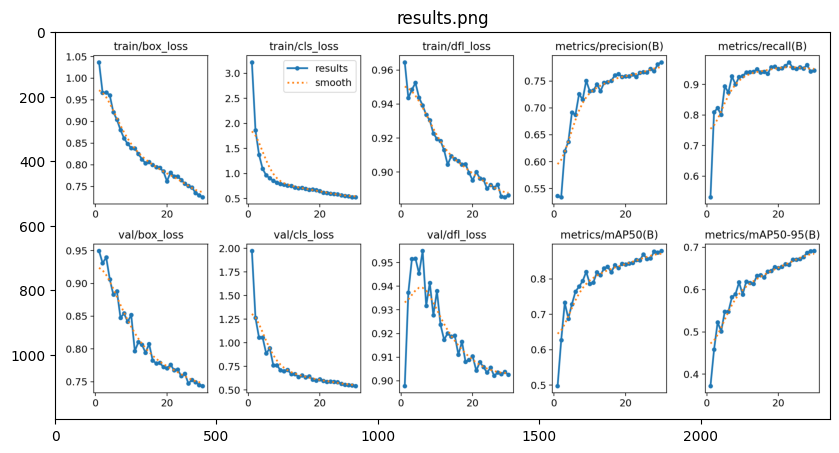

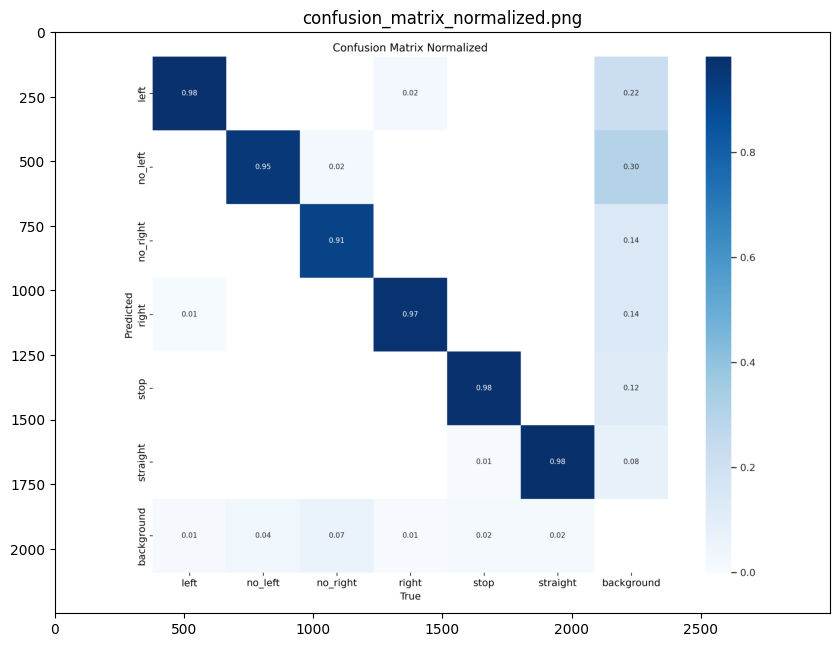

In [31]:
image_dir = '/content/runs/detect/train2'
image_files = ['results.png', 'confusion_matrix_normalized.png']

for filename in image_files:
    img_path = os.path.join(image_dir, filename)
    if os.path.exists(img_path):
        plt.figure(figsize=(10, 10))
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(filename)
        plt.show()
    else:
        print(f"Image not found: {filename}")

### Model Results On Some Test Images

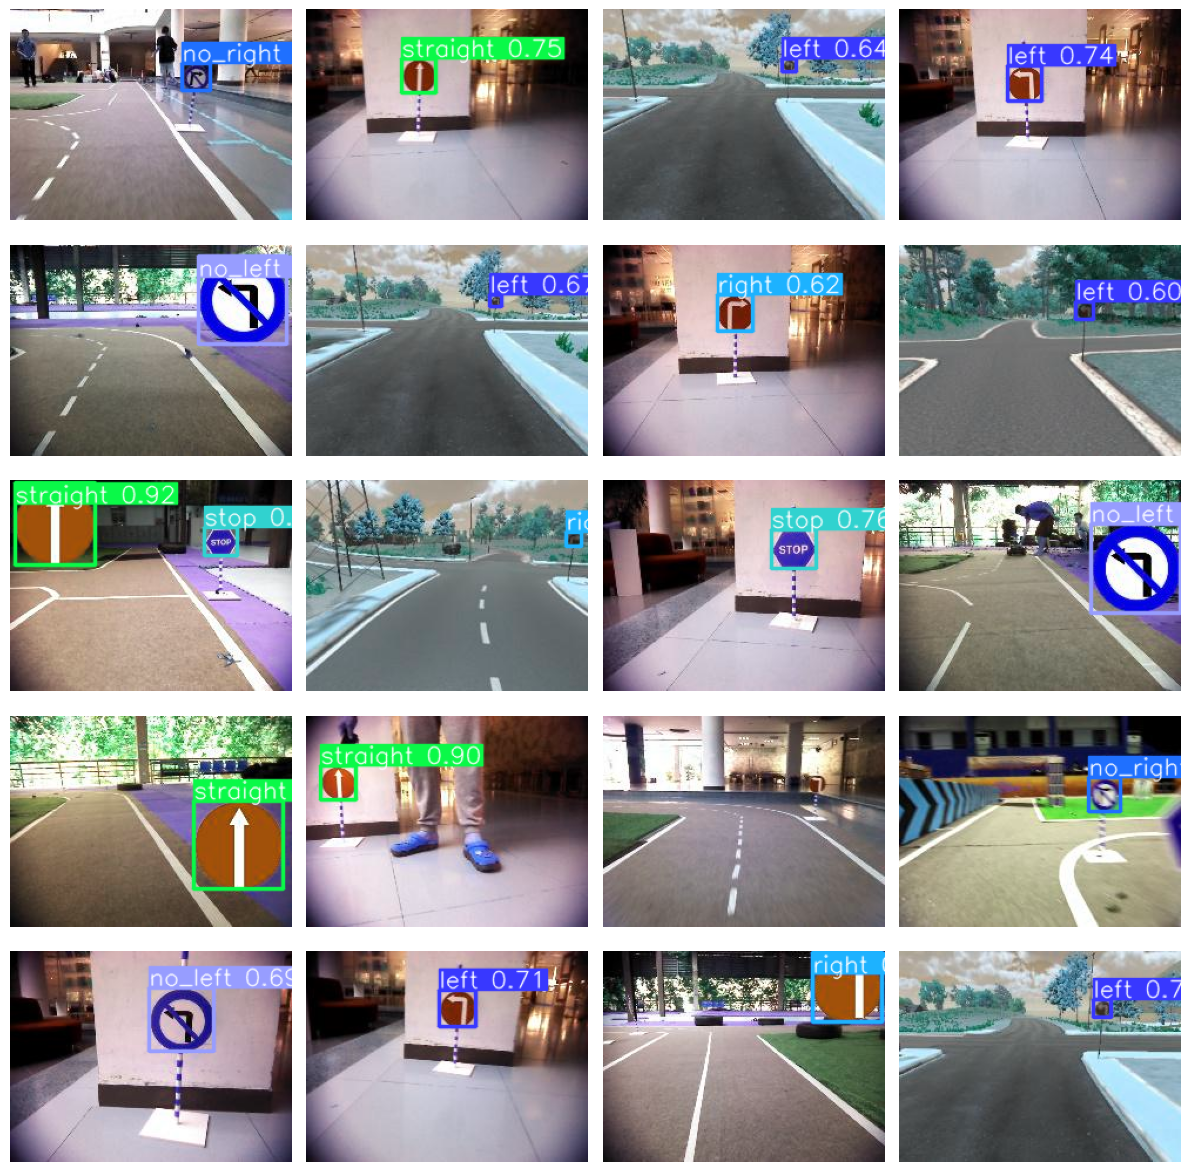

In [22]:
model = YOLO('/content/drive/MyDrive/Models/TrafficSignDetection_Yolov8/detect/train2/weights/best.pt')
test_data_path = '/content/TrafficSigns-1/test/images'

test_images = []
for filename in os.listdir(test_data_path):
    img = cv2.imread(os.path.join(test_data_path, filename))
    test_images.append(img)

num_images = 20
test_images = random.sample(test_images, num_images)

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

for i, img in enumerate(test_images):
    results = model.predict(source=img, verbose=False)

    row = i // 4
    col = i % 4
    axes[row, col].axis('off')
    axes[row, col].imshow(results[0].plot())

plt.tight_layout()
plt.show()